**Credit Score - Naive Bayes**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# 1) Training (X and y) and testing (X and y) datasets.

In [ ]:
import pandas as pd

df = pd.read_csv('CREDIT_SCORE_AFSMOTE.csv')

print(df)

      Age  Gender  Income  Education  Marital Status  Number of Children  \
0    25.0       0   50000          1               1                   0   
1    30.0       1  100000          4               0                   2   
2    35.0       0   75000          2               0                   1   
3    40.0       1  125000          3               1                   0   
4    45.0       0  100000          1               0                   0   
..    ...     ...     ...        ...             ...                 ...   
159  29.0       0   27500          3               1                   0   
160  34.0       1   47500          0               1                   0   
161  39.0       0   62500          1               0                   2   
162  44.0       1   87500          4               1                   0   
163  49.0       0   77500          2               0                   1   

     Home Ownership  Credit Score  
0                 1           2.0  
1              

In [ ]:
X = df.drop('Credit Score', axis=1) # Remove the 'target' column from the independent variables
y = df['Credit Score'] # Define the dependent variable (label)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
X_train
df.shape

(164, 8)

In [ ]:
X_test
df.shape

(164, 8)

In [ ]:
y_train
df.shape

(164, 8)

In [ ]:
y_test


,Credit Score
135,1.0
115,2.0
131,1.0
55,2.0
95,2.0
...,...
114,2.0
25,1.0
23,2.0
119,2.0


In [ ]:
# Count the number of examples of each class in y_train
train_balance = y_train.value_counts()
print("Balanceamento em y_train:")
print(train_balance)

# Count the number of examples of each class in y_test
test_balance = y_test.value_counts()
print("\nBalanceamento em y_test:")
print(test_balance)

Balanceamento em y_train:
Credit Score
2.0    57
1.0    19
0.0     6
Name: count, dtype: int64

Balanceamento em y_test:
Credit Score
2.0    56
1.0    17
0.0     9
Name: count, dtype: int64


Both in the training and testing datasets, the Score variables [0,1,2] are not balanced.


# 2) Naive Bayes algorithm to the training data.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [ ]:
# Create an instance of the Gaussian Naive Bayes classifier
naive_churn = GaussianNB()

# Train the classifier using the training data
naive_churn.fit(X_train, y_train)

GaussianNB()

# 3) Report the accuracy and recall, and plot the confusion matrix. Interpreting the metrics.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1)  # Correção de Laplace aplicada
model.fit(X_train, y_train)

# Fazer previsões para os dados de treino
y_pred_train = naive_churn.predict(X_train)

# Calcular a acurácia
accuracy = accuracy_score(y_train, y_pred_train)
print("Acurácia:", accuracy)

Acurácia: 1.0


Accuracy = 1

SUSPICIOUS.

🟢 POSITIVE SIDE:

It could be considered a good outcome for a simple data analysis, showing that the model has effectively learned what was implemented during training.

However, it may also be a clear example of:

🔴 OVERFITTING:

The model is memorizing the training data.

The data are highly imbalanced (e.g., 95% class A, 5% class B) — very likely, considering how the data were split.

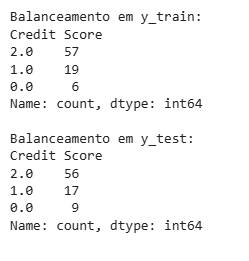

In [ ]:
import plotly.figure_factory as ff

# CONFUSION MATRIX
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Defining class names
class_names = [0, 1, 2]

# Plotting the confusion matrix with Plotly
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=class_names,
    y=class_names,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    font=dict(
        family='Arial',
        size=12,
        color='black'
    )
)

In [ ]:
57+19+6

82

According to the Confusion Matrix, all predictions were TRUE POSITIVES…


In [ ]:
# Cálculo do recall (média macro entre as classes)
recall = recall_score(y_train, y_pred_train, average='macro')

print("Recall (média macro):", recall)

Recall (média macro): 1.0


INSIGHT:

Accuracy: 1.0

Recall: 1.0

Confusion Matrix: 100% correct predictions

My opinion: Overfitting.

# 4) Application of the model to the testing data and results evaluation.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1)  # Laplace smoothing applied
model.fit(X_train, y_train)

y_pred_test = naive_churn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Acurácia nos dados de teste:", accuracy_test)

Acurácia nos dados de teste: 0.9634146341463414


I think this is better than simply getting a value of 1! In my view, another value of 1 would have indicated overfitting; here, I can see that the model may be very effective when using the test data.

In [ ]:
# Recall (macro)
from sklearn.metrics import recall_score
recall_test = recall_score(y_test, y_pred_test, average='macro')
print("Recall (macro) nos dados de teste:", recall_test)


Recall (macro) nos dados de teste: 0.9548319327731093


In [ ]:
# CONFUSION MATRIX
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Defining class names
class_names = [0, 1, 2]

# Plotting the confusion matrix with Plotly
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=class_names,
    y=class_names,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    font=dict(
        family='Arial',
        size=12,
        color='black'
    )
)

# 5) FINAL RESULTS WITH NAIVE BAYES:

In this project, the dataset was already preprocessed (as a result of applying SMOTE to balance the data in the CHURN column), and then the Naive Bayes algorithm was applied. As the method itself suggests, it is a probabilistic generalization, so even with Laplace smoothing, it remains a very general model.

The accuracy = 1 on the training set indicated an extremely high correct prediction rate, which initially suggested overfitting. The confusion matrix and recall = 1 further reinforced this impression.

However, when evaluated on the test data, the model achieved accuracy = 0.96, recall = 0.95, and the confusion matrix showed a few—but very few—misclassifications. This demonstrated another perspective: the model is likely well-trained and highly efficient in prediction.